In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

2023-01-13 14:49:02.404352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-13 14:49:02.404380: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
IMAGE_SIZE = [224,224]

train_path = 'images/'
valid_path = 'test_images/'

In [3]:
resnet = ResNet101V2(input_shape = IMAGE_SIZE+[3], weights='imagenet', include_top = False)


2023-01-13 14:49:34.288744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-13 14:49:34.288789: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-13 14:49:34.288829: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DTTP-E590): /proc/driver/nvidia/version does not exist
2023-01-13 14:49:34.289229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


171317808/171317808 [==============================] - 49s 0us/step


In [5]:
# Don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [18]:
folders = glob('images/*')

In [21]:
# custom layers
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

# create a model object
model = Model(inputs = resnet.input, outputs = prediction)


In [22]:
# view the structure of the model 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 14, 14, 256)  589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv4_block8_out (Add)         (None, 14, 14, 1024  0           ['conv4_block7_out[0][0]',       
                                )                                 'conv4_block8_3_conv[0][0]']    
                                                                                                  
 conv4_block9_preact_bn (BatchN  (None, 14, 14, 1024  4096       ['conv4_block8_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block9_preact_relu (Acti  (None, 14, 14, 1024  0          ['conv4_block9_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_blo

 conv4_block11_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block11_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block11_2_pad[0][0]']    
                                                                                                  
 conv4_block11_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block11_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block11_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block14_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block14_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block14_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block16_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block16_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block16_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block16_out (Add)        (None, 14, 14, 1024  0           ['conv4_block15_out[0][0]',      
                                )                                 'conv4_block16_3_conv[0][0]']   
          

                                                                                                  
 conv4_block19_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block19_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_blo

                                )                                                                 
                                                                                                  
 conv4_block21_out (Add)        (None, 14, 14, 1024  0           ['conv4_block20_out[0][0]',      
                                )                                 'conv4_block21_3_conv[0][0]']   
                                                                                                  
 conv4_block22_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block21_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block22_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block22_preact_bn[0][0]']
 ivation)                       )                                                                 
          

 n)                                                                                               
                                                                                                  
 conv5_block1_2_pad (ZeroPaddin  (None, 9, 9, 512)   0           ['conv5_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 7, 7, 512)    2359296     ['conv5_block1_2_pad[0][0]']     
                                                                                                  
 conv5_block1_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 post_bn (BatchNormalization)   (None, 7, 7, 2048)   8192        ['conv5_block3_out[0][0]']       
                                                                                                  
 post_relu (Activation)         (None, 7, 7, 2048)   0           ['post_bn[0][0]']                
                                                                                                  
 flatten_1 (Flatten)            (None, 100352)       0           ['post_relu[0][0]']              
                                                                                                  
 dense_1 (Dense)                (None, 3)            301059      ['flatten_1[0][0]']              
                                                                                                  
Total params: 42,927,619
Trainable params: 301,059
Non-trainable params: 42,626,560
__________________________________________________________________________________________________


In [23]:
# compile model with cost and optimizer
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

In [24]:
train_datagen = ImageDataGenerator(rescale  = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

training_set = train_datagen.flow_from_directory('./images',
                                                target_size = (224,224),
                                                 batch_size = 32,
                                                class_mode = 'categorical')

# training_set = train_datagen.flow_from_directory('/test_images/',
#                                                 target_size = (224,224),
#                                                  batch_size = 32,
#                                                 class_mode = 'categorical')


Found 60 images belonging to 3 classes.


In [25]:
folders

['images/fox', 'images/daffodil', 'images/pigeon']

In [26]:
training_set

In [27]:
# fit the model
r = model.fit(
    training_set,
#     validation_data - test_set,
    epochs = 5,
#     steps_per_epoch = len(training_set),
#     validation_steps = len(test_set)
)

Epoch 1/5
2/2 [==============================] - 14s 3s/step - loss: 2.7274 - accuracy: 0.5333
Epoch 2/5
2/2 [==============================] - 8s 4s/step - loss: 0.6144 - accuracy: 0.9833
Epoch 3/5
2/2 [==============================] - 7s 4s/step - loss: 0.4247 - accuracy: 0.9500
Epoch 4/5
2/2 [==============================] - 9s 4s/step - loss: 0.3869 - accuracy: 0.9667
Epoch 5/5
2/2 [==============================] - 9s 4s/step - loss: 0.1029 - accuracy: 0.9833


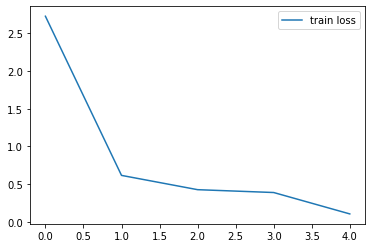

In [28]:
# learning curves
plt.plot(r.history['loss'], label = 'train loss')
# plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()


In [29]:
from bing_image_downloader import downloader

In [30]:
common_mammals = ["badger","bank vole", "barbastelle bat", "bechstein's bat", "field vole", "lynx", "otter", "pine marten"]

In [31]:
for mammal in common_mammals:
    downloader.download(mammal, limit = 20,output_dir="images", adult_filter_off=True)

[%] Downloading Images to /home/den/Google Drive/2. Projects/P:wild_life_classifier/wild_life_classifier/images/badger


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://1.bp.blogspot.com/-iFjDfKPWh78/VA7V7jqzFRI/AAAAAAAAGJg/Xw493cXYSJI/s1600/badger.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static-secure.guim.co.uk/sys-images/Guardian/Pix/pictures/2014/3/14/1394789644939/Badger-014.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://c2.staticflickr.com/4/3342/4615843868_5a801c3a62_b.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i1.treknature.com/photos/15298/badger.jpg
[Error]Invalid image, not saving https://i1.treknature.com/photos/15298/badger.jpg

[!] Issue getting: https://i1.treknature.com/photos/15298/badger.jpg
[!] Error:: Invalid image, not saving https://i1.treknature.com/photos/15298/badger.jpg

[%] Downloading Image #4 from https://southafrica.co.za/images/honey-badger-melli

[%] Indexed 16 Images on Page 21.




[!!]Indexing page: 22

[%] Indexed 16 Images on Page 22.




[!!]Indexing page: 23

[%] Indexed 14 Images on Page 23.


[%] Downloading Image #16 from https://media.sciencephoto.com/image/c0042637/800wm/C0042637-Bank_vole.jpg
[%] File Downloaded !

[%] Downloading Image #17 from https://media.sciencephoto.com/image/c0042638/400wm/C0042638-Bank_vole.jpg
[%] File Downloaded !

[%] Downloading Image #18 from https://i.pinimg.com/736x/24/2f/d8/242fd8c4370e0c09d88928214484523d.jpg
[%] File Downloaded !

[%] Downloading Image #19 from https://shropshiremammalgroup.files.wordpress.com/2020/05/bank-vole-andy-harmer.jpg?w=660
[%] File Downloaded !

[%] Downloading Image #20 from https://www.liveanimalslist.com/interesting-animals/images/bank-vole.jpg
[%] File Downloaded !



[%] Done. Downloaded 20 images.
[%] Downloading Images to /home/den/Google Drive/2. Projects/P:wild_life_classifier/wild_life_classifier/images/barbastelle bat


[!!]Indexing page: 1

[

[!] Issue getting: https://images.cm.archant.co.uk/resource/responsive-image/6575402/article-body-image-landscape/xs/1/xxx-barbastelle-1-charlotte-packman.jpg
[!] Error:: HTTP Error 503: Service Unavailable
[%] Downloading Image #17 from https://www.gutenberg.org/files/25534/25534-h/images/i099.jpg
[%] File Downloaded !

[%] Downloading Image #18 from https://images.cm.archant.co.uk/resource/responsive-image/1579524/article-lead-image/xs/1/barbastelle-john-black.jpg
[!] Issue getting: https://images.cm.archant.co.uk/resource/responsive-image/1579524/article-lead-image/xs/1/barbastelle-john-black.jpg
[!] Error:: HTTP Error 503: Service Unavailable


[!!]Indexing page: 32

[%] Indexed 8 Images on Page 32.




[!!]Indexing page: 33

[%] Indexed 8 Images on Page 33.




[!!]Indexing page: 34

[%] Indexed 8 Images on Page 34.




[!!]Indexing page: 35

[%] Indexed 8 Images on Page 35.




[!!]Indexing page: 36

[%] Indexed 8 Images on Page 36.




[!!]Indexing page: 37

[%] Indexed 14 Image

[%] File Downloaded !



[%] Done. Downloaded 20 images.
[%] Downloading Images to /home/den/Google Drive/2. Projects/P:wild_life_classifier/wild_life_classifier/images/field vole


[!!]Indexing page: 1

[%] Indexed 16 Images on Page 1.


[%] Downloading Image #1 from https://www.peachtreepestcontrol.com/wp-content/uploads/2020/11/Field-vole-1200x846.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://farm9.staticflickr.com/8509/8555878642_525e89c256_z.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://s0.geograph.org.uk/geophotos/04/06/51/4065114_e754b370.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://4.bp.blogspot.com/-mHwP7JuRXqY/XKj4Zh62XXI/AAAAAAAAB1A/OjMk7uTF_wM3gZYUnHAeh5hiuu_PgR1rACEwYBhgL/s1600/field%2Bvole%2B5.4%2Bcrop.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://c2.staticflickr.com/6/5461/10206454875_57f610a15b_b.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://2.bp.blogspot.com/-16hjd_uvMA4/V3z

[%] File Downloaded !

[%] Downloading Image #17 from https://vgboxart.com/resources/render/3125_far-cry-3-prev.png
[%] File Downloaded !



[!!]Indexing page: 2

[%] Indexed 19 Images on Page 2.




[!!]Indexing page: 3

[%] Indexed 18 Images on Page 3.




[!!]Indexing page: 4

[%] Indexed 17 Images on Page 4.




[!!]Indexing page: 5

[%] Indexed 16 Images on Page 5.




[!!]Indexing page: 6

[%] Indexed 15 Images on Page 6.




[!!]Indexing page: 7

[%] Indexed 14 Images on Page 7.




[!!]Indexing page: 8

[%] Indexed 13 Images on Page 8.




[!!]Indexing page: 9

[%] Indexed 9 Images on Page 9.


[%] Downloading Image #18 from http://www.opatcholakeoutfitters.com/images/photos/cat3b.jpg
[%] File Downloaded !

[%] Downloading Image #19 from https://www.wildlifeworldwide.com/images/galleries/europe_poland_bison_elk_birds_winter_gallery_beaver_lukasz_mazurek_wild_poland.jpg
[%] File Downloaded !

[%] Downloading Image #20 from https://www.parcs-zoologiques-lumigny.fr/wp-content/uplo

[%] File Downloaded !

[%] Downloading Image #13 from https://photos.smugmug.com/Photo-of-the-Week/Photo-of-the-week-2011/March-13-2011/i-sz37Kp2/0/8cccf056/L/Pine Marten 002-L.jpg
[!] Issue getting: https://photos.smugmug.com/Photo-of-the-Week/Photo-of-the-week-2011/March-13-2011/i-sz37Kp2/0/8cccf056/L/Pine Marten 002-L.jpg
[!] Error:: URL can't contain control characters. '/Photo-of-the-Week/Photo-of-the-week-2011/March-13-2011/i-sz37Kp2/0/8cccf056/L/Pine Marten 002-L.jpg' (found at least ' ')
[%] Downloading Image #13 from https://64.media.tumblr.com/756920b94964dbafbd5b7a28b09028fc/tumblr_ns8vk055lz1u4qq6ko1_500.jpg
[Error]Invalid image, not saving https://64.media.tumblr.com/756920b94964dbafbd5b7a28b09028fc/tumblr_ns8vk055lz1u4qq6ko1_500.jpg

[!] Issue getting: https://64.media.tumblr.com/756920b94964dbafbd5b7a28b09028fc/tumblr_ns8vk055lz1u4qq6ko1_500.jpg
[!] Error:: Invalid image, not saving https://64.media.tumblr.com/756920b94964dbafbd5b7a28b09028fc/tumblr_ns8vk055lz1u4qq6ko1_5

In [32]:
resnet = ResNet101V2(input_shape = IMAGE_SIZE+[3], weights='imagenet', include_top = False)


In [33]:
# Don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [34]:
folders = glob('images/*')

In [35]:
# custom layers
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

# create a model object
model = Model(inputs = resnet.input, outputs = prediction)


In [36]:
# view the structure of the model 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 14, 14, 256)  589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv4_block8_out (Add)         (None, 14, 14, 1024  0           ['conv4_block7_out[0][0]',       
                                )                                 'conv4_block8_3_conv[0][0]']    
                                                                                                  
 conv4_block9_preact_bn (BatchN  (None, 14, 14, 1024  4096       ['conv4_block8_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block9_preact_relu (Acti  (None, 14, 14, 1024  0          ['conv4_block9_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_blo

 conv4_block11_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block11_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block11_2_pad[0][0]']    
                                                                                                  
 conv4_block11_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block11_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block11_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block14_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block14_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block14_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block16_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block16_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block16_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block16_out (Add)        (None, 14, 14, 1024  0           ['conv4_block15_out[0][0]',      
                                )                                 'conv4_block16_3_conv[0][0]']   
          

                                                                                                  
 conv4_block19_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block19_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_blo

                                )                                                                 
                                                                                                  
 conv4_block21_out (Add)        (None, 14, 14, 1024  0           ['conv4_block20_out[0][0]',      
                                )                                 'conv4_block21_3_conv[0][0]']   
                                                                                                  
 conv4_block22_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block21_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block22_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block22_preact_bn[0][0]']
 ivation)                       )                                                                 
          

 n)                                                                                               
                                                                                                  
 conv5_block1_2_pad (ZeroPaddin  (None, 9, 9, 512)   0           ['conv5_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 7, 7, 512)    2359296     ['conv5_block1_2_pad[0][0]']     
                                                                                                  
 conv5_block1_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 post_bn (BatchNormalization)   (None, 7, 7, 2048)   8192        ['conv5_block3_out[0][0]']       
                                                                                                  
 post_relu (Activation)         (None, 7, 7, 2048)   0           ['post_bn[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 100352)       0           ['post_relu[0][0]']              
                                                                                                  
 dense_2 (Dense)                (None, 11)           1103883     ['flatten_2[0][0]']              
                                                                                                  
Total params: 43,730,443
Trainable params: 1,103,883
Non-trainable params: 42,626,560
__________________________________________________________________________________________________


In [37]:
# compile model with cost and optimizer
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

In [38]:
train_datagen = ImageDataGenerator(rescale  = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

training_set = train_datagen.flow_from_directory('./images',
                                                target_size = (224,224),
                                                 batch_size = 32,
                                                class_mode = 'categorical')

# training_set = train_datagen.flow_from_directory('/test_images/',
#                                                 target_size = (224,224),
#                                                  batch_size = 32,
#                                                 class_mode = 'categorical')


Found 219 images belonging to 11 classes.


In [39]:
folders

['images/lynx',
 "images/bechstein's bat",
 'images/otter',
 'images/pine marten',
 'images/field vole',
 'images/badger',
 'images/fox',
 'images/bank vole',
 'images/daffodil',
 'images/barbastelle bat',
 'images/pigeon']

In [40]:
training_set

In [41]:
# fit the model
r = model.fit(
    training_set,
#     validation_data - test_set,
    epochs = 5,
#     steps_per_epoch = len(training_set),
#     validation_steps = len(test_set)
)

Epoch 1/5
7/7 [==============================] - 34s 3s/step - loss: 8.7953 - accuracy: 0.4201
Epoch 2/5
7/7 [==============================] - 32s 5s/step - loss: 2.5498 - accuracy: 0.8356
Epoch 3/5
7/7 [==============================] - 32s 4s/step - loss: 0.8296 - accuracy: 0.9178
Epoch 4/5
7/7 [==============================] - 28s 4s/step - loss: 0.5167 - accuracy: 0.9452
Epoch 5/5
7/7 [==============================] - 28s 4s/step - loss: 0.8182 - accuracy: 0.9498


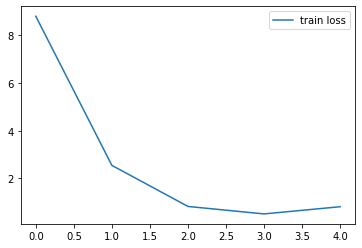

In [42]:
# learning curves
plt.plot(r.history['loss'], label = 'train loss')
# plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

In [43]:
import pickle
pickle.dump(model, open("resnet_model.p", 'wb'))

INFO:tensorflow:Assets written to: ram://effa1885-6cd6-4667-a905-9a3cf17ce872/assets


INFO:tensorflow:Assets written to: ram://effa1885-6cd6-4667-a905-9a3cf17ce872/assets
